In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv("churn.csv")
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.drop(["customerID"],axis="columns",inplace=True)

In [6]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
df["TotalCharges"].values    #shld not be str

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [8]:
#pd.to_numeric(df.TotalCharges)   #converts to numbers

In [9]:
pd.to_numeric(df.TotalCharges,errors="coerce").isnull()  #coerce will apply except those giving error

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [10]:
df[pd.to_numeric(df.TotalCharges,errors="coerce").isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [11]:
df1=df[df.TotalCharges !=" "]
df1.shape

(7032, 20)

In [12]:
df1["TotalCharges"]=pd.to_numeric(df1.TotalCharges)

C:\Users\jkeer\AppData\Local\Temp\ipykernel_5576\213795568.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["TotalCharges"]=pd.to_numeric(df1.TotalCharges)


In [13]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

Text(0, 0.5, 'No of Customers')

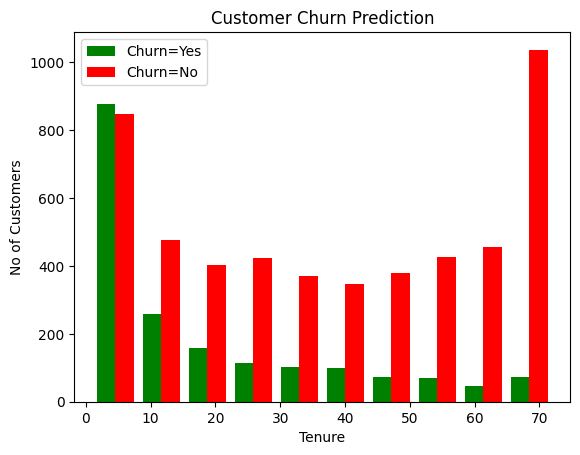

In [14]:
tenure_churn_no=df1[df1.Churn=='No'].tenure
tenure_churn_yes=df1[df1.Churn=='Yes'].tenure
plt.title("Customer Churn Prediction")
plt.hist([tenure_churn_yes,tenure_churn_no],color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()
plt.xlabel('Tenure')
plt.ylabel('No of Customers')

Text(0, 0.5, 'No of Customers')

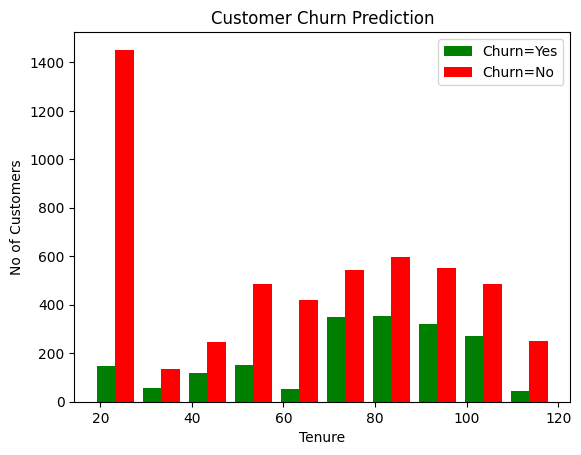

In [15]:
tenure_churn_no=df1[df1.Churn=='No'].MonthlyCharges
tenure_churn_yes=df1[df1.Churn=='Yes'].MonthlyCharges
plt.title("Customer Churn Prediction")
plt.hist([tenure_churn_yes,tenure_churn_no],color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()
plt.xlabel('Tenure')
plt.ylabel('No of Customers')

In [16]:
def checkuniquecol(df):
    for column in df:
        if df[column].dtypes=='object':
            print(f'{column} : {df[column].unique()}')

In [17]:
checkuniquecol(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [18]:
#to replace value use .replace()

df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

C:\Users\jkeer\AppData\Local\Temp\ipykernel_5576\2304582259.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace=True)
C:\Users\jkeer\AppData\Local\Temp\ipykernel_5576\2304582259.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace=True)


In [19]:
checkuniquecol(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [20]:
df1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [21]:
yes_no_col=['Partner', 'Dependents','PhoneService', 'MultipleLines', 'OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV','StreamingMovies', 'PaperlessBilling', 'Churn']

In [22]:
for col in yes_no_col:
    df1[col].replace({'Yes':1,'No':0},inplace=True)

C:\Users\jkeer\AppData\Local\Temp\ipykernel_5576\429774014.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes':1,'No':0},inplace=True)


In [23]:
checkuniquecol(df1)

gender : ['Female' 'Male']
InternetService : ['DSL' 'Fiber optic' 'No']
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [24]:
for col in df1:
    print(f'{col}:{df1[col].unique()}')

gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]


In [25]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

C:\Users\jkeer\AppData\Local\Temp\ipykernel_5576\698335744.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female':1,'Male':0},inplace=True)


In [26]:
df1.gender.unique()

array([1, 0], dtype=int64)

In [27]:
df2=pd.get_dummies(df1, columns=['InternetService','Contract','PaymentMethod'])

In [29]:
col_to_scale=['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler() #to convert values btw 1 to 0

df2[col_to_scale]=scaler.fit_transform(df2[col_to_scale])


In [30]:
x=df2.drop('Churn',axis="columns")
y=df2['Churn']

In [31]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=5)

In [36]:
len(xtest.columns)

26

In [44]:
xtrain = np.asarray(xtrain).astype(np.float32)
ytrain = np.asarray(ytrain).astype(np.float32)
xtest = np.asarray(xtest).astype(np.float32)
ytest = np.asarray(ytest).astype(np.float32)

In [45]:
import tensorflow as tf
from tensorflow import keras

model=keras.Sequential([
    keras.layers.Dense(26,input_shape=(26,),activation="relu"),
    keras.layers.Dense(15,activation="relu"),
    keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model.fit(xtrain,ytrain,epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 1ms/step - loss: 0.5138 - accuracy: 0.7509
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4367 - accuracy: 0.7892
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4282 - accuracy: 0.7957
Epoch 4/100
176/176 [==============================] - 0s 987us/step - loss: 0.4250 - accuracy: 0.7950
Epoch 5/100
176/176 [==============================] - 0s 955us/step - loss: 0.4212 - accuracy: 0.7998
Epoch 6/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4194 - accuracy: 0.7998
Epoch 7/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4179 - accuracy: 0.8016
Epoch 8/100
176/176 [==============================] - 0s 935us/step - loss: 0.4155 - accuracy: 0.8039
Epoch 9/100
176/176 [==============================] - 0s 944us/step - loss: 0.4141 - accuracy: 0.8048
Epoch 10/100
176/176 [==============================] - 0s 990us/step - loss: 0.412

In [46]:
model.evaluate(xtest,ytest)

44/44 [==============================] - 0s 1ms/step - loss: 0.4280 - accuracy: 0.7889


[0.4280271828174591, 0.7889125943183899]

In [49]:
yp=model.predict(xtest)

44/44 [==============================] - 0s 2ms/step


In [52]:
ypred=[]
for i in yp:
    if i>0.5:
        ypred.append(1)
    else:
        ypred.append(0)

In [53]:
from sklearn.metrics import confusion_matrix,classification_report

print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.85      0.87      0.86      1046
         1.0       0.60      0.55      0.57       361

    accuracy                           0.79      1407
   macro avg       0.72      0.71      0.72      1407
weighted avg       0.78      0.79      0.79      1407



Text(95.72222222222221, 0.5, 'Truth')

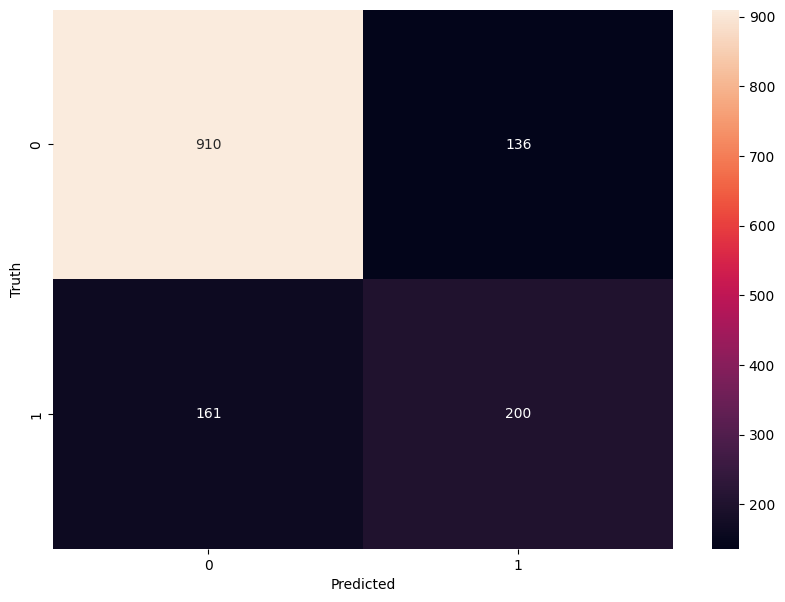

In [54]:
import seaborn as sns
cm=tf.math.confusion_matrix(labels=ytest,predictions=ypred)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')